In [1]:
import torch
import torchvision
import numpy as np

from torch.utils.data.dataset import Subset

In [2]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [3]:
ds_train10 = torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]));
print(ds_train10)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.1307,), std=(0.3081,))
                         )
    Target Transforms (if any): None


In [4]:
print(len(ds_train10))

60000


In [5]:
ln = len(ds_train10);
train_y = np.zeros(ln);
for idx, (data, target) in enumerate(ds_train10):
    train_y[idx] = target.numpy()

idx = np.where(train_y <= 8)[0]
ds_train9 = Subset(ds_train10, idx)
print(len(ds_train9))

54051


In [6]:
idx = np.where(train_y <= 7)[0]
ds_train8 = Subset(ds_train10, idx)
print(len(ds_train8))

48200


In [7]:
ds_test10 = torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

In [8]:
print(len(ds_test10))

10000


In [9]:
ln = len(ds_test10);
test_y = np.zeros(ln);
for idx, (data, target) in enumerate(ds_test10):
    test_y[idx] = target.numpy()

idx = np.where(test_y <= 8)[0]
ds_test9 = Subset(ds_test10, idx)
print(len(ds_test9))

8991


In [10]:
idx = np.where(test_y <= 7)[0]
ds_test8 = Subset(ds_test10, idx)
print(len(ds_test8))

8017


In [11]:
train_loader10 = torch.utils.data.DataLoader(
    ds_train10,
  batch_size=batch_size_train, shuffle=True)

test_loader10 = torch.utils.data.DataLoader(
    ds_test10,
  batch_size=batch_size_test, shuffle=True)

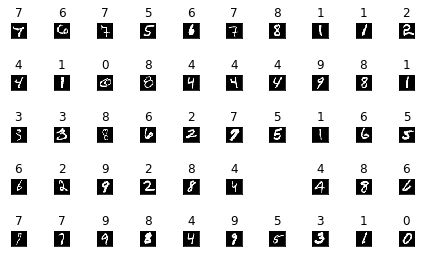

In [12]:
examples = enumerate(test_loader10)
batch_idx, (example_data, example_targets) = next(examples)

example_data.shape

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [13]:
train_loader8 = torch.utils.data.DataLoader(
    ds_train8,
  batch_size=batch_size_train, shuffle=True)

test_loader8 = torch.utils.data.DataLoader(
    ds_test8,
  batch_size=batch_size_test, shuffle=True)

torch.Size([1000, 1, 28, 28])


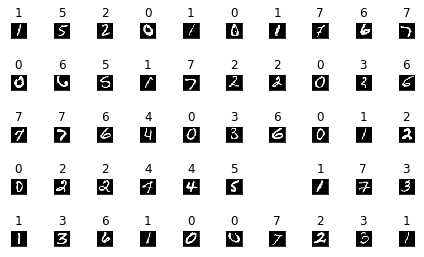

In [14]:
examples = enumerate(test_loader8)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

example_data.shape

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [15]:
idx = np.where(train_y <= 4)[0]
ds_train5 = Subset(ds_train10, idx)
print(len(ds_train5))

30596


In [16]:
idx = np.where(test_y <= 4)[0]
ds_test5 = Subset(ds_test10, idx)
print(len(ds_test5))

5139


In [17]:
train_loader5 = torch.utils.data.DataLoader(
    ds_train5,
  batch_size=batch_size_train, shuffle=True)

test_loader5 = torch.utils.data.DataLoader(
    ds_test5,
  batch_size=batch_size_test, shuffle=True)

In [18]:
idx = np.where(train_y <= 1)[0]
ds_train2 = Subset(ds_train10, idx)
print(len(ds_train2))

12665


In [19]:
idx = np.where(test_y <= 1)[0]
ds_test2 = Subset(ds_test10, idx)
print(len(ds_test2))

2115


In [20]:
train_loader2 = torch.utils.data.DataLoader(
    ds_train2,
  batch_size=batch_size_train, shuffle=True)

test_loader2 = torch.utils.data.DataLoader(
    ds_test2,
  batch_size=batch_size_test, shuffle=True)

# Train network using 0-9

In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [23]:
def train(network, train_loader, epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.cuda()
        target = target.cuda()            
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), './results/model.pth')
            torch.save(optimizer.state_dict(), './results/optimizer.pth')
    return network

In [24]:
def test(network, test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.cuda()
            target = target.cuda()            
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [25]:
net1 = Net().cuda()
optimizer = optim.SGD(net1.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader10.dataset) for i in range(n_epochs + 1)]

In [26]:
test(net1, test_loader10)
for epoch in range(1, n_epochs + 1):
    train(net1, train_loader10, epoch)
    test(net1, test_loader10)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3111, Accuracy: 956/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296428
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.275135
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.290798
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.282064
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.258089
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.213377
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.210812
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.159625
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.076725
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.050290
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.919861
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.947154
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.758680
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.462732
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.574901
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.556828
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.358212
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.291479
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.280410
Train Epoch: 1 [12160/6

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.278168
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.439769
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.217291
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.258742
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.265625
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.213628
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.313699
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.251113
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.186378
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.455516
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.274573
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.302203
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.222525
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.245448
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.493234
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.495537
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.373417
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.215059
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.200566
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.423534


Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.110679
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.380068
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.149398
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.274498
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.291689
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.339421
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.226408
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.271932
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.328961
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.332856
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.337463
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.212005
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.345667
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.058675
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.305580
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.159506
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.321072
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.261939
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.378035
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.208678


Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.300516
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.465941
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.252868
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.120264
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.134791
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.137490
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.254618
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.502740
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.134832
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.412872
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.099467
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.129690
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.062403
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.307494
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.153802
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.324872
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.196463
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.264732
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.133931
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.470937


Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.205250
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.074272

Test set: Avg. loss: 0.0593, Accuracy: 9816/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.195859
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.183627
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.131834
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.069188
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.254059
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.077695
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.283479
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.224602
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.148367
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.232872
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.252813
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.219346
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.188102
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.243118
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.243987
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.075515
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.217166
Train Epoch: 8 [10880

Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.127651
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.119514
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.280890
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.174676
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.312178
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.087110
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.134723
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.242130
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.133048
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.094104
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.305479
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.239999
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.050261
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.062300
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.149544
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.219416
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.134464
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.140804
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.276580
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.130013


In [27]:
b = 2000;
noise = torch.randn(b, 1, 28, 28)
print(noise)

tensor([[[[-2.6191e-01,  1.6000e+00,  1.2026e-01,  ...,  5.0821e-01,
            1.5822e+00, -2.8444e-01],
          [-2.5215e-01,  3.0717e-01,  5.8217e-01,  ..., -3.7917e-01,
            1.1804e+00,  2.1767e-01],
          [-1.0980e+00, -2.9605e-01, -3.7059e-01,  ..., -7.1855e-01,
           -9.7577e-01,  4.2951e-01],
          ...,
          [ 1.6117e+00,  1.8910e-01,  5.3194e-01,  ...,  2.9000e+00,
           -5.5116e-01,  1.3791e+00],
          [-5.1855e-01,  8.8223e-01,  1.4188e+00,  ..., -9.4058e-01,
            3.5701e-01, -1.4769e-02],
          [-4.3208e-01, -4.6863e-01,  3.0607e-01,  ...,  3.7375e-02,
            2.2970e-01, -4.8209e-01]]],


        [[[ 8.8264e-02,  8.0247e-01,  9.9029e-02,  ..., -2.8812e-03,
           -1.2020e+00, -4.9668e-02],
          [ 1.9805e-01, -2.1863e-01, -7.2834e-01,  ...,  3.2264e-01,
            4.4164e-01,  7.3346e-01],
          [-2.0377e+00,  1.2917e+00, -4.6451e-01,  ..., -6.4024e-02,
            1.0503e+00, -1.1456e+00],
          ...,
   

[72.564896 72.02741  71.821785 71.39236  71.20723  71.03239  70.89848
 70.71081  70.527596 70.294136 70.03065  69.96297  69.82146  69.67461
 69.50367  69.299385 69.17481  68.94679  68.83895  68.775856 68.683044
 68.42211  68.35752  68.25724  68.207825 68.00232  67.8506   67.7941
 67.61232  67.551254 67.29059  67.17794  67.10745  67.02427  66.935
 66.77299  66.71027  66.61384  66.541756 66.38652  66.25177  66.14398
 66.0609   65.926056 65.81205  65.70636  65.6203   65.53505  65.429085
 65.26066  65.23882  65.15011  64.98914  64.93331  64.91308  64.79178
 64.638176 64.582016 64.49468  64.35157  64.24058  64.21586  64.03889
 63.914597 63.812458 63.78243  63.753395 63.580963 63.531845 63.428234
 63.342968 63.188034 63.146896 63.038284 62.98759  62.877308 62.80342
 62.60198  62.5365   62.486435 62.452354 62.39067  62.31934  62.193577
 62.052067 61.9578   61.929737 61.884182 61.83291  61.659546 61.59147
 61.426918 61.42095  61.339073 61.3266   61.129658 61.124012 61.034714
 60.962086 60.8632

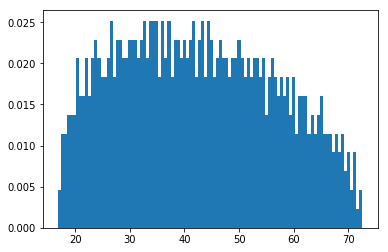

In [33]:
from numpy.linalg import svd
ll = noise.view(b, -1).cpu().detach().numpy() 
_, svd_noise, _ = svd(ll)
_ = plt.hist(svd_noise, bins=100, normed=True)
print(svd_noise)

In [28]:
output = net1(noise.cuda())

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [29]:
ll = net1.last
print(ll.shape)

torch.Size([2000, 50])


In [30]:
ll = ll.cpu().detach().numpy() 
_, svd_net1_c10, _ = svd(ll)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.13621958, 0.        , 0.08513724, 0.08513724, 0.06810981,
        0.06810978, 0.06810978, 0.06810981, 0.0340549 , 0.0340549 ,
        0.03405488, 0.        , 0.01702745, 0.        , 0.01702745,
        0.01702745, 0.        , 0.01702745, 0.        , 0.        ,
        0.01702742, 0.        , 0.01702745, 0.        , 0.        ,
        0.01702745, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01702748, 0.        , 0.        ,
        0.        , 0.01702742, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

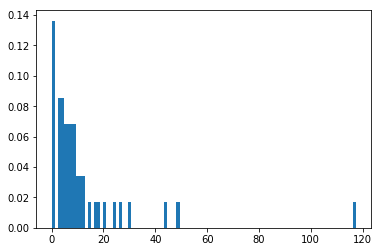

In [31]:
plt.hist(svd_net1_c10, bins=100, normed=True)

In [32]:
print(svd_net1_c10)

[1.17457413e+02 4.91695213e+01 4.39079323e+01 3.04415607e+01
 2.66073036e+01 2.43308563e+01 2.09312172e+01 1.83306732e+01
 1.70965862e+01 1.46694355e+01 1.28857641e+01 1.19768610e+01
 1.14052038e+01 1.11284990e+01 1.01634130e+01 9.88846111e+00
 9.26074505e+00 9.09348679e+00 8.78005695e+00 8.39824390e+00
 8.08632469e+00 8.00556278e+00 7.73175907e+00 7.18629885e+00
 6.78189182e+00 6.52420998e+00 6.36985445e+00 6.11617136e+00
 5.86494064e+00 5.65963888e+00 4.98579502e+00 4.94813776e+00
 4.65096569e+00 4.45912600e+00 3.95222735e+00 3.65528131e+00
 3.54803348e+00 3.24312544e+00 2.99603581e+00 2.74233174e+00
 2.69110823e+00 2.36616898e+00 8.05393815e-01 7.39224195e-01
 6.93635583e-01 6.04064167e-01 4.02935237e-01 3.90441000e-01
 8.10913260e-15 8.10913260e-15]


# Net2 similar to net, but last layer dim=100, instead of 50

In [26]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [27]:
net2 = Net2().cuda()
n_epochs = 10
optimizer = optim.SGD(net2.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader10.dataset) for i in range(n_epochs + 1)]

In [28]:
test(net2, test_loader10)
for epoch in range(1, n_epochs + 1):
    train(net2, train_loader10, epoch)
    test(net2, test_loader10)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.3074, Accuracy: 1114/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.288522
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.310102
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.290101
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.284409
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.290248
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.298102
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.282577
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.248449
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.245279
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.243803
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.204534
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.181953
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.168794
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.102715
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.055047
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.916580
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.738268
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.468500
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.407731
Train Epoch: 1 [12160

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.266035
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.185744
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.290547
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.134534
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.217128
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.278396
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.333344
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.431278
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.349911
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.414125
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.141687
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.490166
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.198963
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.294182
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.166205
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.180784
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.164786
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.362507
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.146096
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.353935


Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.185238
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.215423
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.212814
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.171681
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.141145
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.223571
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.242784
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.164667
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.154460
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.121669
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.105415
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.346812
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.083585
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.210093
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.315057
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.188002
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.228438
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.259277
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.108278
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.251671


Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.062279
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.130699
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.156980
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.072087
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.415923
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.124832
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.155165
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.079360
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.099484
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.182737
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.079778
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.218099
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.089105
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.347106
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.331802
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.161071
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.161372
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.083050
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.171177
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.170312


Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.355349
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.142604

Test set: Avg. loss: 0.0548, Accuracy: 9816/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.180897
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.145571
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.110002
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.200543
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.070035
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.122384
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.130428
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.116895
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.261097
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.044600
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.322890
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.134576
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.183788
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.143282
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.251352
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.147351
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.169182
Train Epoch: 8 [10880

Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.202216
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.132746
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.026898
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.169453
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.062813
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.172081
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.061824
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.076804
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.079331
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.210631
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.272324
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.082527
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.134004
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.303418
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.263496
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.276479
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.217985
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.075055
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.149603
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.197337


torch.Size([2000, 100])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00301022, 0.        , 0.00602043, 0.00903065, 0.00602043,
        0.00602043, 0.02709195, 0.02107152, 0.03010217, 0.0361226 ,
        0.02709195, 0.02709195, 0.04214304, 0.05719412, 0.06020434,
        0.09632694, 0.06923499, 0.11137803, 0.10836781, 0.07826564,
        0.1053576 , 0.10836781, 0.12040868, 0.13846998, 0.1414802 ,
        0.09933716, 0.13846998, 0.20469476, 0.14449042, 0.18663346,
        0.15352107, 0.19265389, 0.16255172, 0.1595415 , 0.13545977,
        0.1595415 , 0.16255172, 0.14750063, 0.13846998, 0.21974584,
        0.13244955, 0.13846998, 0.13846998, 0.1234189 , 0.10836781,
        0.09933716, 0.09933716, 0.06923499, 0.08127586, 0.07826564,
        0.09933716, 0.09933716, 0.09632694, 0.06923499, 0.06622477,
        0.07525543, 0.04214304, 0.03913282, 0.0361226 , 0.04816347,
        0.04816347, 0.03010217, 0.03913282, 0.0361226 , 0.02107152,
        0.01505109, 0.02709195, 0.02107152, 0.02408174, 0.02408174,
        0.03311239, 0.01505109, 0.00602043, 0.00

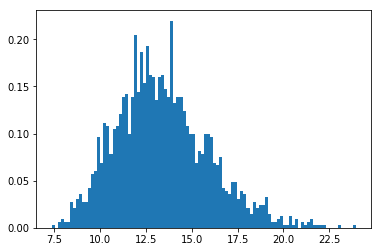

In [29]:
output = net2(noise.cuda())
ll = net2.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net2_c10 = LID(ll, ll, k=50)
plt.hist(lid_net2_c10, bins=100, normed=True)

# Try 8 classes

In [30]:
class Net_c8(nn.Module):
    def __init__(self):
        super(Net_c8, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 8)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [31]:
net_c8 = Net_c8().cuda()
n_epochs = 10
optimizer = optim.SGD(net_c8.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader8.dataset) for i in range(n_epochs + 1)]

test(net_c8, test_loader8)
for epoch in range(1, n_epochs + 1):
    train(net_c8, train_loader8, epoch)
    test(net_c8, test_loader8)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.0851, Accuracy: 953/8017 (11%)

Train Epoch: 1 [0/48200 (0%)]	Loss: 2.080665
Train Epoch: 1 [640/48200 (1%)]	Loss: 2.077751
Train Epoch: 1 [1280/48200 (3%)]	Loss: 2.054353
Train Epoch: 1 [1920/48200 (4%)]	Loss: 2.033965
Train Epoch: 1 [2560/48200 (5%)]	Loss: 1.990703
Train Epoch: 1 [3200/48200 (7%)]	Loss: 1.951077
Train Epoch: 1 [3840/48200 (8%)]	Loss: 1.842593
Train Epoch: 1 [4480/48200 (9%)]	Loss: 1.821124
Train Epoch: 1 [5120/48200 (11%)]	Loss: 1.542811
Train Epoch: 1 [5760/48200 (12%)]	Loss: 1.499018
Train Epoch: 1 [6400/48200 (13%)]	Loss: 1.317794
Train Epoch: 1 [7040/48200 (15%)]	Loss: 1.324623
Train Epoch: 1 [7680/48200 (16%)]	Loss: 1.246471
Train Epoch: 1 [8320/48200 (17%)]	Loss: 0.994980
Train Epoch: 1 [8960/48200 (19%)]	Loss: 0.791617
Train Epoch: 1 [9600/48200 (20%)]	Loss: 0.807380
Train Epoch: 1 [10240/48200 (21%)]	Loss: 0.614277
Train Epoch: 1 [10880/48200 (23%)]	Loss: 0.647308
Train Epoch: 1 [11520/48200 (24%)]	Loss: 0.749157
Train Epoch: 1 [12160/

Train Epoch: 3 [7680/48200 (16%)]	Loss: 0.238202
Train Epoch: 3 [8320/48200 (17%)]	Loss: 0.204273
Train Epoch: 3 [8960/48200 (19%)]	Loss: 0.112339
Train Epoch: 3 [9600/48200 (20%)]	Loss: 0.372577
Train Epoch: 3 [10240/48200 (21%)]	Loss: 0.226432
Train Epoch: 3 [10880/48200 (23%)]	Loss: 0.115228
Train Epoch: 3 [11520/48200 (24%)]	Loss: 0.150101
Train Epoch: 3 [12160/48200 (25%)]	Loss: 0.263199
Train Epoch: 3 [12800/48200 (27%)]	Loss: 0.168046
Train Epoch: 3 [13440/48200 (28%)]	Loss: 0.157311
Train Epoch: 3 [14080/48200 (29%)]	Loss: 0.290823
Train Epoch: 3 [14720/48200 (31%)]	Loss: 0.270473
Train Epoch: 3 [15360/48200 (32%)]	Loss: 0.340872
Train Epoch: 3 [16000/48200 (33%)]	Loss: 0.186803
Train Epoch: 3 [16640/48200 (34%)]	Loss: 0.129556
Train Epoch: 3 [17280/48200 (36%)]	Loss: 0.213797
Train Epoch: 3 [17920/48200 (37%)]	Loss: 0.264308
Train Epoch: 3 [18560/48200 (38%)]	Loss: 0.169477
Train Epoch: 3 [19200/48200 (40%)]	Loss: 0.143088
Train Epoch: 3 [19840/48200 (41%)]	Loss: 0.320433
Trai

Train Epoch: 5 [15360/48200 (32%)]	Loss: 0.130724
Train Epoch: 5 [16000/48200 (33%)]	Loss: 0.279688
Train Epoch: 5 [16640/48200 (34%)]	Loss: 0.179391
Train Epoch: 5 [17280/48200 (36%)]	Loss: 0.171943
Train Epoch: 5 [17920/48200 (37%)]	Loss: 0.193679
Train Epoch: 5 [18560/48200 (38%)]	Loss: 0.211494
Train Epoch: 5 [19200/48200 (40%)]	Loss: 0.176691
Train Epoch: 5 [19840/48200 (41%)]	Loss: 0.144760
Train Epoch: 5 [20480/48200 (42%)]	Loss: 0.235052
Train Epoch: 5 [21120/48200 (44%)]	Loss: 0.251301
Train Epoch: 5 [21760/48200 (45%)]	Loss: 0.065417
Train Epoch: 5 [22400/48200 (46%)]	Loss: 0.150386
Train Epoch: 5 [23040/48200 (48%)]	Loss: 0.189008
Train Epoch: 5 [23680/48200 (49%)]	Loss: 0.109398
Train Epoch: 5 [24320/48200 (50%)]	Loss: 0.247290
Train Epoch: 5 [24960/48200 (52%)]	Loss: 0.209570
Train Epoch: 5 [25600/48200 (53%)]	Loss: 0.096663
Train Epoch: 5 [26240/48200 (54%)]	Loss: 0.224310
Train Epoch: 5 [26880/48200 (56%)]	Loss: 0.101614
Train Epoch: 5 [27520/48200 (57%)]	Loss: 0.118140


Train Epoch: 7 [23040/48200 (48%)]	Loss: 0.189784
Train Epoch: 7 [23680/48200 (49%)]	Loss: 0.285413
Train Epoch: 7 [24320/48200 (50%)]	Loss: 0.151739
Train Epoch: 7 [24960/48200 (52%)]	Loss: 0.093503
Train Epoch: 7 [25600/48200 (53%)]	Loss: 0.283423
Train Epoch: 7 [26240/48200 (54%)]	Loss: 0.151320
Train Epoch: 7 [26880/48200 (56%)]	Loss: 0.104477
Train Epoch: 7 [27520/48200 (57%)]	Loss: 0.118996
Train Epoch: 7 [28160/48200 (58%)]	Loss: 0.216587
Train Epoch: 7 [28800/48200 (60%)]	Loss: 0.110020
Train Epoch: 7 [29440/48200 (61%)]	Loss: 0.096755
Train Epoch: 7 [30080/48200 (62%)]	Loss: 0.170507
Train Epoch: 7 [30720/48200 (64%)]	Loss: 0.098796
Train Epoch: 7 [31360/48200 (65%)]	Loss: 0.112937
Train Epoch: 7 [32000/48200 (66%)]	Loss: 0.211110
Train Epoch: 7 [32640/48200 (68%)]	Loss: 0.178929
Train Epoch: 7 [33280/48200 (69%)]	Loss: 0.415125
Train Epoch: 7 [33920/48200 (70%)]	Loss: 0.129206
Train Epoch: 7 [34560/48200 (72%)]	Loss: 0.113458
Train Epoch: 7 [35200/48200 (73%)]	Loss: 0.105352


Train Epoch: 9 [30720/48200 (64%)]	Loss: 0.111690
Train Epoch: 9 [31360/48200 (65%)]	Loss: 0.044955
Train Epoch: 9 [32000/48200 (66%)]	Loss: 0.263454
Train Epoch: 9 [32640/48200 (68%)]	Loss: 0.073768
Train Epoch: 9 [33280/48200 (69%)]	Loss: 0.128747
Train Epoch: 9 [33920/48200 (70%)]	Loss: 0.089640
Train Epoch: 9 [34560/48200 (72%)]	Loss: 0.579141
Train Epoch: 9 [35200/48200 (73%)]	Loss: 0.162319
Train Epoch: 9 [35840/48200 (74%)]	Loss: 0.213115
Train Epoch: 9 [36480/48200 (76%)]	Loss: 0.061674
Train Epoch: 9 [37120/48200 (77%)]	Loss: 0.081147
Train Epoch: 9 [37760/48200 (78%)]	Loss: 0.044464
Train Epoch: 9 [38400/48200 (80%)]	Loss: 0.104212
Train Epoch: 9 [39040/48200 (81%)]	Loss: 0.129581
Train Epoch: 9 [39680/48200 (82%)]	Loss: 0.106596
Train Epoch: 9 [40320/48200 (84%)]	Loss: 0.047931
Train Epoch: 9 [40960/48200 (85%)]	Loss: 0.074869
Train Epoch: 9 [41600/48200 (86%)]	Loss: 0.035494
Train Epoch: 9 [42240/48200 (88%)]	Loss: 0.052306
Train Epoch: 9 [42880/48200 (89%)]	Loss: 0.124216


torch.Size([2000, 50])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00704178, 0.00352089, 0.01408356, 0.02464624, 0.01056267,
        0.01408356, 0.03168802, 0.03520891, 0.05281336, 0.07393871,
        0.08450138, 0.09858495, 0.1161894 , 0.13027296, 0.11266851,
        0.13027296, 0.22181613, 0.21829524, 0.21125346, 0.20773256,
        0.24646236, 0.20069078, 0.22885791, 0.22885791, 0.17956544,
        0.18308633, 0.25350415, 0.20421167, 0.25350415, 0.21829524,
        0.21477435, 0.23589969, 0.23589969, 0.22885791, 0.13731475,
        0.193649  , 0.15139831, 0.10210584, 0.16548187, 0.12323118,
        0.17252366, 0.06689693, 0.10562673, 0.10210584, 0.05281336,
        0.08450138, 0.05985515, 0.05281336, 0.07393871, 0.06689693,
        0.04929247, 0.02464624, 0.02112535, 0.01760445, 0.02112535,
        0.03520891, 0.02464624, 0.01056267, 0.01056267, 0.02464624,
        0.02816713, 0.02112535, 0.01408356, 0.01408356, 0.01056267,
        0.01056267, 0.00704178, 0.00352089, 0.00704178, 0.01056267,
        0.        , 0.        , 0.01056267, 0.00

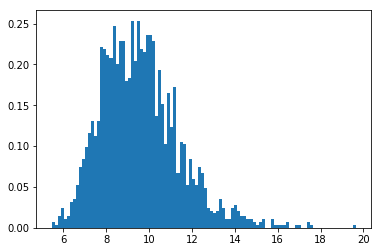

In [32]:
output = net_c8(noise.cuda())
ll = net_c8.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net1_c8 = LID(ll, ll, k=50)
plt.hist(lid_net1_c8, bins=100, normed=True)

In [33]:
class Net2_c8(nn.Module):
    def __init__(self):
        super(Net2_c8, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 100)
        self.fc2 = nn.Linear(100, 8)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [34]:
net2_c8 = Net2_c8().cuda()
n_epochs = 10
optimizer = optim.SGD(net2_c8.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader8.dataset) for i in range(n_epochs + 1)]

test(net2_c8, test_loader8)
for epoch in range(1, n_epochs + 1):
    train(net2_c8, train_loader8, epoch)
    test(net2_c8, test_loader8)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.0767, Accuracy: 1093/8017 (13%)

Train Epoch: 1 [0/48200 (0%)]	Loss: 2.124532
Train Epoch: 1 [640/48200 (1%)]	Loss: 2.080121
Train Epoch: 1 [1280/48200 (3%)]	Loss: 2.001012
Train Epoch: 1 [1920/48200 (4%)]	Loss: 2.000285
Train Epoch: 1 [2560/48200 (5%)]	Loss: 1.937588
Train Epoch: 1 [3200/48200 (7%)]	Loss: 1.935493
Train Epoch: 1 [3840/48200 (8%)]	Loss: 1.729519
Train Epoch: 1 [4480/48200 (9%)]	Loss: 1.619585
Train Epoch: 1 [5120/48200 (11%)]	Loss: 1.392503
Train Epoch: 1 [5760/48200 (12%)]	Loss: 1.315869
Train Epoch: 1 [6400/48200 (13%)]	Loss: 1.125140
Train Epoch: 1 [7040/48200 (15%)]	Loss: 1.302177
Train Epoch: 1 [7680/48200 (16%)]	Loss: 0.987594
Train Epoch: 1 [8320/48200 (17%)]	Loss: 0.975525
Train Epoch: 1 [8960/48200 (19%)]	Loss: 0.838939
Train Epoch: 1 [9600/48200 (20%)]	Loss: 0.667607
Train Epoch: 1 [10240/48200 (21%)]	Loss: 0.614115
Train Epoch: 1 [10880/48200 (23%)]	Loss: 0.755726
Train Epoch: 1 [11520/48200 (24%)]	Loss: 0.767577
Train Epoch: 1 [12160

Train Epoch: 3 [6400/48200 (13%)]	Loss: 0.146493
Train Epoch: 3 [7040/48200 (15%)]	Loss: 0.307869
Train Epoch: 3 [7680/48200 (16%)]	Loss: 0.094759
Train Epoch: 3 [8320/48200 (17%)]	Loss: 0.119808
Train Epoch: 3 [8960/48200 (19%)]	Loss: 0.499658
Train Epoch: 3 [9600/48200 (20%)]	Loss: 0.067145
Train Epoch: 3 [10240/48200 (21%)]	Loss: 0.214824
Train Epoch: 3 [10880/48200 (23%)]	Loss: 0.225647
Train Epoch: 3 [11520/48200 (24%)]	Loss: 0.101158
Train Epoch: 3 [12160/48200 (25%)]	Loss: 0.095540
Train Epoch: 3 [12800/48200 (27%)]	Loss: 0.165291
Train Epoch: 3 [13440/48200 (28%)]	Loss: 0.147344
Train Epoch: 3 [14080/48200 (29%)]	Loss: 0.183161
Train Epoch: 3 [14720/48200 (31%)]	Loss: 0.220958
Train Epoch: 3 [15360/48200 (32%)]	Loss: 0.221444
Train Epoch: 3 [16000/48200 (33%)]	Loss: 0.114379
Train Epoch: 3 [16640/48200 (34%)]	Loss: 0.153379
Train Epoch: 3 [17280/48200 (36%)]	Loss: 0.154812
Train Epoch: 3 [17920/48200 (37%)]	Loss: 0.258330
Train Epoch: 3 [18560/48200 (38%)]	Loss: 0.137543
Train 

Train Epoch: 5 [14080/48200 (29%)]	Loss: 0.085986
Train Epoch: 5 [14720/48200 (31%)]	Loss: 0.091218
Train Epoch: 5 [15360/48200 (32%)]	Loss: 0.259002
Train Epoch: 5 [16000/48200 (33%)]	Loss: 0.095736
Train Epoch: 5 [16640/48200 (34%)]	Loss: 0.118999
Train Epoch: 5 [17280/48200 (36%)]	Loss: 0.290808
Train Epoch: 5 [17920/48200 (37%)]	Loss: 0.075848
Train Epoch: 5 [18560/48200 (38%)]	Loss: 0.084447
Train Epoch: 5 [19200/48200 (40%)]	Loss: 0.181716
Train Epoch: 5 [19840/48200 (41%)]	Loss: 0.174951
Train Epoch: 5 [20480/48200 (42%)]	Loss: 0.129419
Train Epoch: 5 [21120/48200 (44%)]	Loss: 0.119647
Train Epoch: 5 [21760/48200 (45%)]	Loss: 0.116237
Train Epoch: 5 [22400/48200 (46%)]	Loss: 0.203935
Train Epoch: 5 [23040/48200 (48%)]	Loss: 0.073762
Train Epoch: 5 [23680/48200 (49%)]	Loss: 0.112127
Train Epoch: 5 [24320/48200 (50%)]	Loss: 0.150749
Train Epoch: 5 [24960/48200 (52%)]	Loss: 0.226141
Train Epoch: 5 [25600/48200 (53%)]	Loss: 0.275428
Train Epoch: 5 [26240/48200 (54%)]	Loss: 0.086640


Train Epoch: 7 [21760/48200 (45%)]	Loss: 0.197354
Train Epoch: 7 [22400/48200 (46%)]	Loss: 0.047364
Train Epoch: 7 [23040/48200 (48%)]	Loss: 0.032852
Train Epoch: 7 [23680/48200 (49%)]	Loss: 0.137532
Train Epoch: 7 [24320/48200 (50%)]	Loss: 0.207822
Train Epoch: 7 [24960/48200 (52%)]	Loss: 0.027329
Train Epoch: 7 [25600/48200 (53%)]	Loss: 0.139072
Train Epoch: 7 [26240/48200 (54%)]	Loss: 0.066644
Train Epoch: 7 [26880/48200 (56%)]	Loss: 0.038952
Train Epoch: 7 [27520/48200 (57%)]	Loss: 0.109432
Train Epoch: 7 [28160/48200 (58%)]	Loss: 0.093271
Train Epoch: 7 [28800/48200 (60%)]	Loss: 0.045407
Train Epoch: 7 [29440/48200 (61%)]	Loss: 0.084699
Train Epoch: 7 [30080/48200 (62%)]	Loss: 0.141938
Train Epoch: 7 [30720/48200 (64%)]	Loss: 0.083401
Train Epoch: 7 [31360/48200 (65%)]	Loss: 0.030332
Train Epoch: 7 [32000/48200 (66%)]	Loss: 0.080836
Train Epoch: 7 [32640/48200 (68%)]	Loss: 0.016513
Train Epoch: 7 [33280/48200 (69%)]	Loss: 0.037777
Train Epoch: 7 [33920/48200 (70%)]	Loss: 0.081834


Train Epoch: 9 [29440/48200 (61%)]	Loss: 0.189876
Train Epoch: 9 [30080/48200 (62%)]	Loss: 0.132867
Train Epoch: 9 [30720/48200 (64%)]	Loss: 0.058648
Train Epoch: 9 [31360/48200 (65%)]	Loss: 0.236816
Train Epoch: 9 [32000/48200 (66%)]	Loss: 0.030990
Train Epoch: 9 [32640/48200 (68%)]	Loss: 0.032491
Train Epoch: 9 [33280/48200 (69%)]	Loss: 0.190632
Train Epoch: 9 [33920/48200 (70%)]	Loss: 0.072591
Train Epoch: 9 [34560/48200 (72%)]	Loss: 0.203781
Train Epoch: 9 [35200/48200 (73%)]	Loss: 0.035547
Train Epoch: 9 [35840/48200 (74%)]	Loss: 0.032931
Train Epoch: 9 [36480/48200 (76%)]	Loss: 0.233333
Train Epoch: 9 [37120/48200 (77%)]	Loss: 0.085153
Train Epoch: 9 [37760/48200 (78%)]	Loss: 0.030904
Train Epoch: 9 [38400/48200 (80%)]	Loss: 0.034929
Train Epoch: 9 [39040/48200 (81%)]	Loss: 0.096662
Train Epoch: 9 [39680/48200 (82%)]	Loss: 0.164802
Train Epoch: 9 [40320/48200 (84%)]	Loss: 0.099479
Train Epoch: 9 [40960/48200 (85%)]	Loss: 0.063189
Train Epoch: 9 [41600/48200 (86%)]	Loss: 0.013310


torch.Size([2000, 100])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00354959, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01064877, 0.        , 0.01419837, 0.01419837,
        0.02484714, 0.02129755, 0.03549591, 0.02484714, 0.03904551,
        0.06389265, 0.04614469, 0.04969428, 0.09583897, 0.07454142,
        0.10648774, 0.10648774, 0.13133488, 0.09938856, 0.14908284,
        0.17392998, 0.14908284, 0.13843407, 0.19877712, 0.18457875,
        0.13843407, 0.19167794, 0.21652508, 0.17392998, 0.22717385,
        0.16328121, 0.17038039, 0.24492181, 0.19522753, 0.18102916,
        0.19167794, 0.19167794, 0.17747957, 0.16328121, 0.14198366,
        0.15973161, 0.14198366, 0.17392998, 0.11003733, 0.16328121,
        0.15618202, 0.11358693, 0.13488447, 0.11358693, 0.07454142,
        0.08873979, 0.1242357 , 0.06034305, 0.04969428, 0.05324387,
        0.07809101, 0.04969428, 0.03904551, 0.06389265, 0.04969428,
        0.05679346, 0.03194632, 0.01064877, 0.02839673, 0.02129755,
        0.01064877, 0.02839673, 0.01774796, 0.01

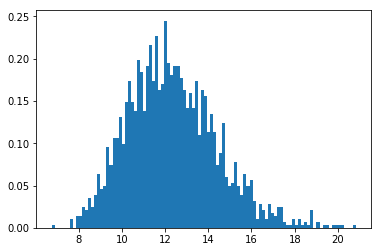

In [35]:
output = net2_c8(noise.cuda())
ll = net2_c8.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net2_c8 = LID(ll, ll, k=50)
plt.hist(lid_net2_c8, bins=100, normed=True)

In [36]:
print(lid_net1_c10.mean())
print(lid_net2_c10.mean())

print(lid_net1_c8.mean())
print(lid_net2_c8.mean())

9.791598638637002
13.379641296242637
9.588037746069197
12.34017129407341


# Train network using 0-4

In [46]:
class Net_c5(nn.Module):
    def __init__(self):
        super(Net_c5, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 5)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [47]:
net_c5 = Net_c5().cuda()
n_epochs = 10
optimizer = optim.SGD(net_c5.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader5.dataset) for i in range(n_epochs + 1)]

test(net_c5, test_loader5)
for epoch in range(1, n_epochs + 1):
    train(net_c5, train_loader5, epoch)
    test(net_c5, test_loader5)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 1.6136, Accuracy: 776/5139 (15%)

Train Epoch: 1 [0/30596 (0%)]	Loss: 1.624736
Train Epoch: 1 [640/30596 (2%)]	Loss: 1.574385
Train Epoch: 1 [1280/30596 (4%)]	Loss: 1.527636
Train Epoch: 1 [1920/30596 (6%)]	Loss: 1.447317
Train Epoch: 1 [2560/30596 (8%)]	Loss: 1.273492
Train Epoch: 1 [3200/30596 (10%)]	Loss: 1.208273
Train Epoch: 1 [3840/30596 (13%)]	Loss: 1.018849
Train Epoch: 1 [4480/30596 (15%)]	Loss: 0.882609
Train Epoch: 1 [5120/30596 (17%)]	Loss: 0.804402
Train Epoch: 1 [5760/30596 (19%)]	Loss: 0.896352
Train Epoch: 1 [6400/30596 (21%)]	Loss: 0.567690
Train Epoch: 1 [7040/30596 (23%)]	Loss: 0.417135
Train Epoch: 1 [7680/30596 (25%)]	Loss: 0.492278
Train Epoch: 1 [8320/30596 (27%)]	Loss: 0.576188
Train Epoch: 1 [8960/30596 (29%)]	Loss: 0.281412
Train Epoch: 1 [9600/30596 (31%)]	Loss: 0.420193
Train Epoch: 1 [10240/30596 (33%)]	Loss: 0.406761
Train Epoch: 1 [10880/30596 (35%)]	Loss: 0.440940
Train Epoch: 1 [11520/30596 (38%)]	Loss: 0.268332
Train Epoch: 1 [121

Train Epoch: 4 [11520/30596 (38%)]	Loss: 0.117020
Train Epoch: 4 [12160/30596 (40%)]	Loss: 0.153038
Train Epoch: 4 [12800/30596 (42%)]	Loss: 0.075280
Train Epoch: 4 [13440/30596 (44%)]	Loss: 0.154982
Train Epoch: 4 [14080/30596 (46%)]	Loss: 0.097636
Train Epoch: 4 [14720/30596 (48%)]	Loss: 0.156357
Train Epoch: 4 [15360/30596 (50%)]	Loss: 0.386735
Train Epoch: 4 [16000/30596 (52%)]	Loss: 0.066318
Train Epoch: 4 [16640/30596 (54%)]	Loss: 0.036759
Train Epoch: 4 [17280/30596 (56%)]	Loss: 0.059006
Train Epoch: 4 [17920/30596 (58%)]	Loss: 0.166732
Train Epoch: 4 [18560/30596 (61%)]	Loss: 0.059458
Train Epoch: 4 [19200/30596 (63%)]	Loss: 0.168574
Train Epoch: 4 [19840/30596 (65%)]	Loss: 0.178940
Train Epoch: 4 [20480/30596 (67%)]	Loss: 0.061106
Train Epoch: 4 [21120/30596 (69%)]	Loss: 0.086548
Train Epoch: 4 [21760/30596 (71%)]	Loss: 0.061440
Train Epoch: 4 [22400/30596 (73%)]	Loss: 0.145853
Train Epoch: 4 [23040/30596 (75%)]	Loss: 0.062898
Train Epoch: 4 [23680/30596 (77%)]	Loss: 0.136555


Train Epoch: 7 [23040/30596 (75%)]	Loss: 0.148550
Train Epoch: 7 [23680/30596 (77%)]	Loss: 0.030178
Train Epoch: 7 [24320/30596 (79%)]	Loss: 0.016463
Train Epoch: 7 [24960/30596 (81%)]	Loss: 0.022412
Train Epoch: 7 [25600/30596 (84%)]	Loss: 0.020551
Train Epoch: 7 [26240/30596 (86%)]	Loss: 0.109369
Train Epoch: 7 [26880/30596 (88%)]	Loss: 0.140623
Train Epoch: 7 [27520/30596 (90%)]	Loss: 0.075738
Train Epoch: 7 [28160/30596 (92%)]	Loss: 0.112684
Train Epoch: 7 [28800/30596 (94%)]	Loss: 0.071483
Train Epoch: 7 [29440/30596 (96%)]	Loss: 0.026024
Train Epoch: 7 [30080/30596 (98%)]	Loss: 0.019757

Test set: Avg. loss: 0.0210, Accuracy: 5100/5139 (99%)

Train Epoch: 8 [0/30596 (0%)]	Loss: 0.099283
Train Epoch: 8 [640/30596 (2%)]	Loss: 0.138834
Train Epoch: 8 [1280/30596 (4%)]	Loss: 0.097541
Train Epoch: 8 [1920/30596 (6%)]	Loss: 0.312480
Train Epoch: 8 [2560/30596 (8%)]	Loss: 0.119726
Train Epoch: 8 [3200/30596 (10%)]	Loss: 0.033646
Train Epoch: 8 [3840/30596 (13%)]	Loss: 0.050083
Train Epo

torch.Size([2000, 50])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00249761, 0.00249761, 0.00249761, 0.00749284, 0.00999045,
        0.02747373, 0.0399618 , 0.04745463, 0.04745463, 0.07243075,
        0.05744508, 0.12488061, 0.09990449, 0.11239255, 0.13986628,
        0.14985673, 0.15235434, 0.16234479, 0.2048042 , 0.19481375,
        0.16234479, 0.19231614, 0.19481375, 0.24226838, 0.20730181,
        0.21978987, 0.1848233 , 0.16983763, 0.1848233 , 0.17233524,
        0.13487106, 0.1024021 , 0.12737822, 0.09740688, 0.10489971,
        0.07243075, 0.10739732, 0.06493792, 0.07492837, 0.08491881,
        0.05244986, 0.05494747, 0.02997135, 0.02997135, 0.03246896,
        0.03246896, 0.0199809 , 0.02747373, 0.01748329, 0.00749284,
        0.02747373, 0.01498567, 0.00749284, 0.00999045, 0.01498567,
        0.00749284, 0.00999045, 0.00249761, 0.00499522, 0.00249761,
        0.00749284, 0.        , 0.        , 0.        , 0.00249761,
        0.00499522, 0.        , 0.00249761, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

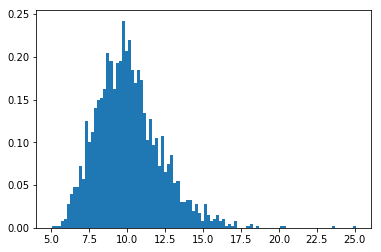

In [48]:
output = net_c5(noise.cuda())
ll = net_c5.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net1_c5 = LID(ll, ll, k=50)
plt.hist(lid_net1_c5, bins=100, normed=True)

In [50]:
print(np.mean(lid_net1_c5))

10.128637566955044


# Train network using 0-1

In [55]:
class Net_c2(nn.Module):
    def __init__(self):
        super(Net_c2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        self.last = x
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [60]:
net_c2 = Net_c2().cuda()
n_epochs = 30
optimizer = optim.SGD(net_c2.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader2.dataset) for i in range(n_epochs + 1)]

test(net_c2, test_loader2)
for epoch in range(1, n_epochs + 1):
    train(net_c2, train_loader2, epoch)
    test(net_c2, test_loader2)

/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.6630, Accuracy: 980/2115 (46%)

Train Epoch: 1 [0/12665 (0%)]	Loss: 0.730942
Train Epoch: 1 [640/12665 (5%)]	Loss: 0.530172
Train Epoch: 1 [1280/12665 (10%)]	Loss: 0.331076
Train Epoch: 1 [1920/12665 (15%)]	Loss: 0.219369
Train Epoch: 1 [2560/12665 (20%)]	Loss: 0.121802
Train Epoch: 1 [3200/12665 (25%)]	Loss: 0.086594
Train Epoch: 1 [3840/12665 (30%)]	Loss: 0.068915
Train Epoch: 1 [4480/12665 (35%)]	Loss: 0.029769
Train Epoch: 1 [5120/12665 (40%)]	Loss: 0.081206
Train Epoch: 1 [5760/12665 (45%)]	Loss: 0.135490
Train Epoch: 1 [6400/12665 (51%)]	Loss: 0.055422
Train Epoch: 1 [7040/12665 (56%)]	Loss: 0.073580
Train Epoch: 1 [7680/12665 (61%)]	Loss: 0.031799
Train Epoch: 1 [8320/12665 (66%)]	Loss: 0.040979
Train Epoch: 1 [8960/12665 (71%)]	Loss: 0.010712
Train Epoch: 1 [9600/12665 (76%)]	Loss: 0.036680
Train Epoch: 1 [10240/12665 (81%)]	Loss: 0.017262
Train Epoch: 1 [10880/12665 (86%)]	Loss: 0.021737
Train Epoch: 1 [11520/12665 (91%)]	Loss: 0.020572
Train Epoch: 1 [


Test set: Avg. loss: 0.0014, Accuracy: 2114/2115 (99%)

Train Epoch: 9 [0/12665 (0%)]	Loss: 0.002993
Train Epoch: 9 [640/12665 (5%)]	Loss: 0.009096
Train Epoch: 9 [1280/12665 (10%)]	Loss: 0.003589
Train Epoch: 9 [1920/12665 (15%)]	Loss: 0.000592
Train Epoch: 9 [2560/12665 (20%)]	Loss: 0.001687
Train Epoch: 9 [3200/12665 (25%)]	Loss: 0.026976
Train Epoch: 9 [3840/12665 (30%)]	Loss: 0.002124
Train Epoch: 9 [4480/12665 (35%)]	Loss: 0.001033
Train Epoch: 9 [5120/12665 (40%)]	Loss: 0.002208
Train Epoch: 9 [5760/12665 (45%)]	Loss: 0.000430
Train Epoch: 9 [6400/12665 (51%)]	Loss: 0.001817
Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.000974
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.006053
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.000621
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.007114
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.018094
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.000424
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.000322
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.003464
Train Epoch: 9 

Train Epoch: 16 [10240/12665 (81%)]	Loss: 0.002045
Train Epoch: 16 [10880/12665 (86%)]	Loss: 0.006406
Train Epoch: 16 [11520/12665 (91%)]	Loss: 0.000179
Train Epoch: 16 [12160/12665 (96%)]	Loss: 0.001717

Test set: Avg. loss: 0.0017, Accuracy: 2114/2115 (99%)

Train Epoch: 17 [0/12665 (0%)]	Loss: 0.004440
Train Epoch: 17 [640/12665 (5%)]	Loss: 0.025175
Train Epoch: 17 [1280/12665 (10%)]	Loss: 0.000206
Train Epoch: 17 [1920/12665 (15%)]	Loss: 0.000324
Train Epoch: 17 [2560/12665 (20%)]	Loss: 0.000282
Train Epoch: 17 [3200/12665 (25%)]	Loss: 0.001244
Train Epoch: 17 [3840/12665 (30%)]	Loss: 0.008195
Train Epoch: 17 [4480/12665 (35%)]	Loss: 0.004777
Train Epoch: 17 [5120/12665 (40%)]	Loss: 0.001062
Train Epoch: 17 [5760/12665 (45%)]	Loss: 0.000278
Train Epoch: 17 [6400/12665 (51%)]	Loss: 0.000533
Train Epoch: 17 [7040/12665 (56%)]	Loss: 0.009032
Train Epoch: 17 [7680/12665 (61%)]	Loss: 0.002060
Train Epoch: 17 [8320/12665 (66%)]	Loss: 0.001964
Train Epoch: 17 [8960/12665 (71%)]	Loss: 0.00

Train Epoch: 24 [7680/12665 (61%)]	Loss: 0.000312
Train Epoch: 24 [8320/12665 (66%)]	Loss: 0.000460
Train Epoch: 24 [8960/12665 (71%)]	Loss: 0.000706
Train Epoch: 24 [9600/12665 (76%)]	Loss: 0.000757
Train Epoch: 24 [10240/12665 (81%)]	Loss: 0.010789
Train Epoch: 24 [10880/12665 (86%)]	Loss: 0.000090
Train Epoch: 24 [11520/12665 (91%)]	Loss: 0.001752
Train Epoch: 24 [12160/12665 (96%)]	Loss: 0.000059

Test set: Avg. loss: 0.0020, Accuracy: 2114/2115 (99%)

Train Epoch: 25 [0/12665 (0%)]	Loss: 0.000023
Train Epoch: 25 [640/12665 (5%)]	Loss: 0.001693
Train Epoch: 25 [1280/12665 (10%)]	Loss: 0.000091
Train Epoch: 25 [1920/12665 (15%)]	Loss: 0.000974
Train Epoch: 25 [2560/12665 (20%)]	Loss: 0.000229
Train Epoch: 25 [3200/12665 (25%)]	Loss: 0.000082
Train Epoch: 25 [3840/12665 (30%)]	Loss: 0.016137
Train Epoch: 25 [4480/12665 (35%)]	Loss: 0.004767
Train Epoch: 25 [5120/12665 (40%)]	Loss: 0.001386
Train Epoch: 25 [5760/12665 (45%)]	Loss: 0.006480
Train Epoch: 25 [6400/12665 (51%)]	Loss: 0.00

torch.Size([2000, 50])


/home/naiqi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


(array([0.00222785, 0.00222785, 0.        , 0.00222785, 0.00222785,
        0.00222785, 0.00222785, 0.00668356, 0.00445571, 0.00222785,
        0.00891141, 0.00222785, 0.        , 0.00891141, 0.01336712,
        0.01336712, 0.00445571, 0.00668356, 0.02227853, 0.00668356,
        0.01559497, 0.01782282, 0.01336712, 0.01782282, 0.03118994,
        0.02450638, 0.02673424, 0.05124062, 0.0334178 , 0.05792418,
        0.05792418, 0.07351915, 0.075747  , 0.08020271, 0.08465841,
        0.09579768, 0.11584836, 0.13367118, 0.12475977, 0.12921548,
        0.13589903, 0.14926615, 0.16263327, 0.18268395, 0.14481045,
        0.17377254, 0.19382321, 0.13367118, 0.17154468, 0.14035474,
        0.12030406, 0.14481045, 0.12030406, 0.09802553, 0.10248124,
        0.11139265, 0.09356983, 0.08911412, 0.06906344, 0.05792418,
        0.04901277, 0.05569633, 0.04678491, 0.03564565, 0.03118994,
        0.05124062, 0.02896209, 0.02005068, 0.02005068, 0.02896209,
        0.00668356, 0.02673424, 0.01782282, 0.00

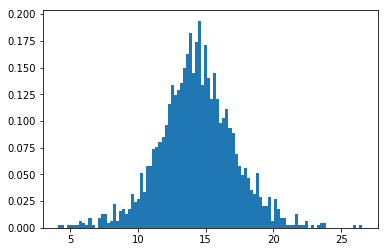

In [61]:
output = net_c2(noise.cuda())
ll = net_c2.last
print(ll.shape)
ll = ll.cpu().detach().numpy() 
lid_net1_c2 = LID(ll, ll, k=50)
plt.hist(lid_net1_c2, bins=100, normed=True)

In [62]:
print(np.mean(lid_net1_c2))

14.337823982033932
